In [12]:
from datetime import datetime, timedelta

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df_bz_1 = pd.read_csv('./data/buzzsumo_domain_name/misinformation_2021-03-23.csv')
df_bz_2 = pd.read_csv('./data/buzzsumo_domain_name/misinformation_2021-03-30.csv')
df_bz = pd.concat([df_bz_1, df_bz_2])

df_bz['date'] = [datetime.fromtimestamp(x).date() for x in df_bz['published_date']]
df_bz['date'] = pd.to_datetime(df_bz['date'])
df_bz = df_bz.drop_duplicates(subset=['url'])

In [7]:
domains_to_plot = [
    'beforeitsnews.com',
    'zerohedge.com',
    'breitbart.com',
    'collective-evolution.com',
    'globalresearch.ca',
    'theepochtimes.com',
    'lifesitenews.com',
    'mercola.com',
    'newsmax.com',
    'summit.news',
    'off-guardian.org',
    'theblaze.com',
]

In [53]:
def rolling_average(df, column):
    return df.resample('W', on='date')[column].mean()

In [56]:
def rolling_average(df, column):
    return df.groupby(by=["date"])[column].sum().rolling(window=7, win_type='triang', center=True).mean()

In [52]:
def arrange_plot(ax):
    
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.grid(axis="y")
    plt.locator_params(axis='y', nbins=4)

    plt.xlim(
        np.datetime64(datetime.strptime('2018-12-31', '%Y-%m-%d') - timedelta(days=4)), 
        np.datetime64(datetime.strptime('2021-01-01', '%Y-%m-%d') + timedelta(days=4))
    )
    
    plt.title(domains_to_plot[idx])

    xticks = [
        np.datetime64('2019-01-01'), np.datetime64('2019-05-01'), np.datetime64('2019-09-01'),
        np.datetime64('2020-01-01'), np.datetime64('2020-05-01'), np.datetime64('2020-09-01'), 
        np.datetime64('2021-01-01')
    ]
    plt.xticks(xticks, rotation=30, ha='right')

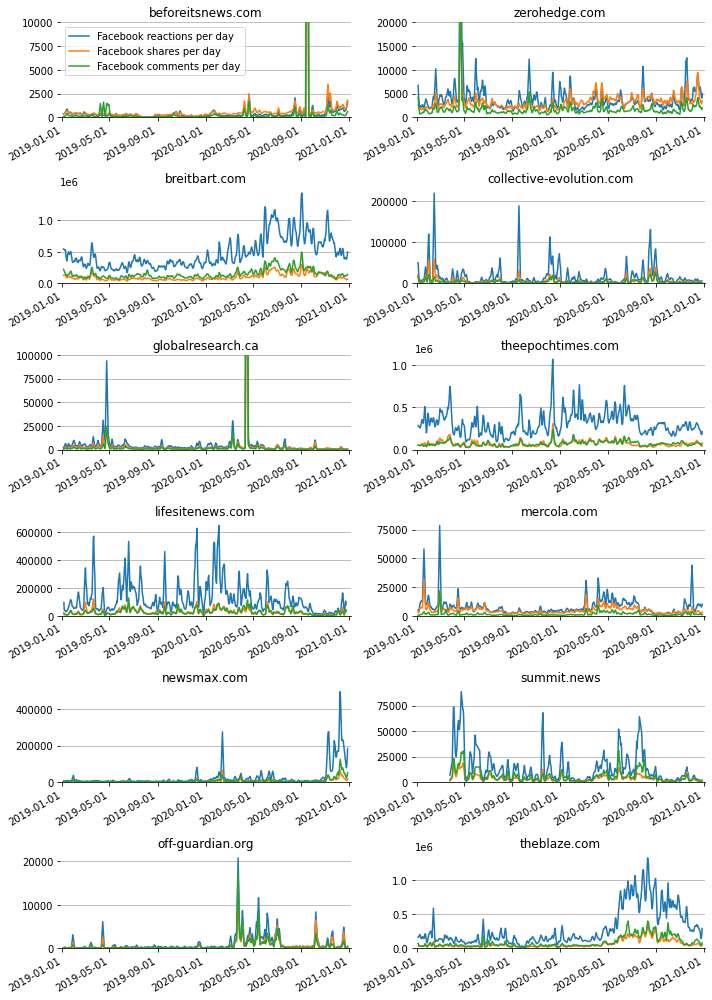

In [57]:
fig = plt.figure(figsize=(10, 14))

for idx in range(len(domains_to_plot)):

    ax = plt.subplot(6, 2, idx + 1)

    df_bz_domain = df_bz[df_bz['domain_name']==domains_to_plot[idx]]

    plt.plot(rolling_average(df_bz_domain, 'facebook_likes'), 
        label="Facebook reactions per day", color="C0")
    plt.plot(rolling_average(df_bz_domain, 'facebook_shares'), 
        label="Facebook shares per day", color="C1")
    plt.plot(rolling_average(df_bz_domain, 'facebook_comments'), 
        label="Facebook comments per day", color="C2")
    
    arrange_plot(ax)
    
    plt.ylim(bottom = 0)

    if idx == 0: 
        plt.legend()
        plt.ylim(top=10000)
    elif idx == 1:
        plt.ylim(top=20000)
    elif idx == 4:
        plt.ylim(top=100000)

plt.tight_layout()
plt.savefig("./shaden_buzzsumo_facebook.png")

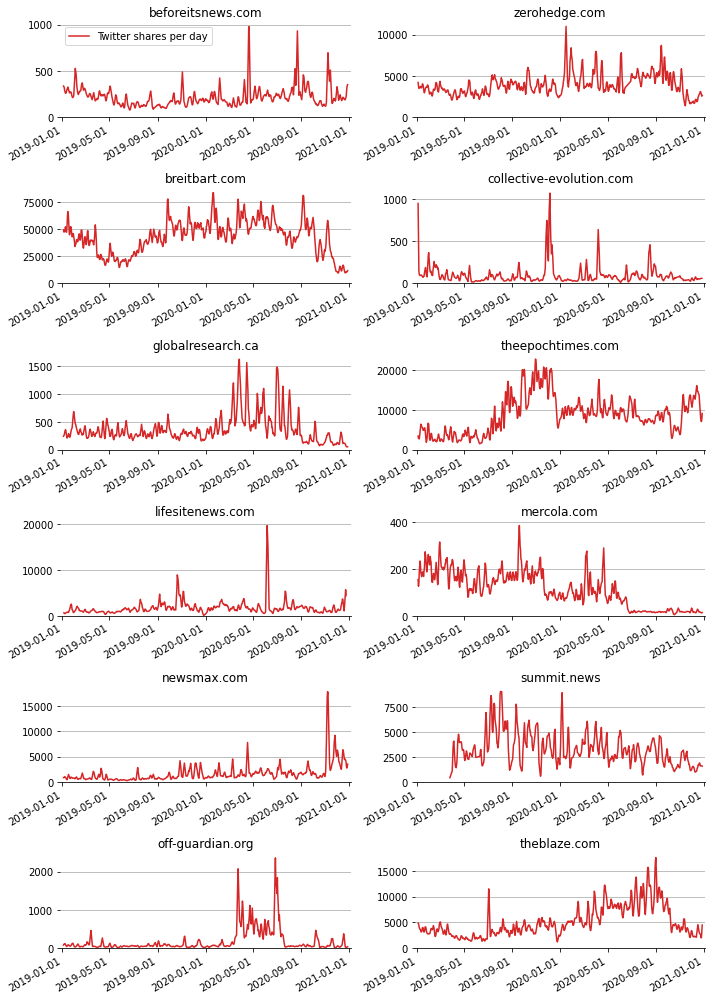

In [58]:
fig = plt.figure(figsize=(10, 14))

for idx in range(len(domains_to_plot)):

    ax = plt.subplot(6, 2, idx + 1)

    df_bz_domain = df_bz[df_bz['domain_name']==domains_to_plot[idx]]

    plt.plot(rolling_average(df_bz_domain, 'twitter_shares'), 
        label="Twitter shares per day", color="C3")
    
    arrange_plot(ax)
    
    plt.ylim(bottom = 0)

    if idx == 0: 
        plt.legend()

plt.tight_layout()
plt.savefig("./shaden_buzzsumo_twitter.png")

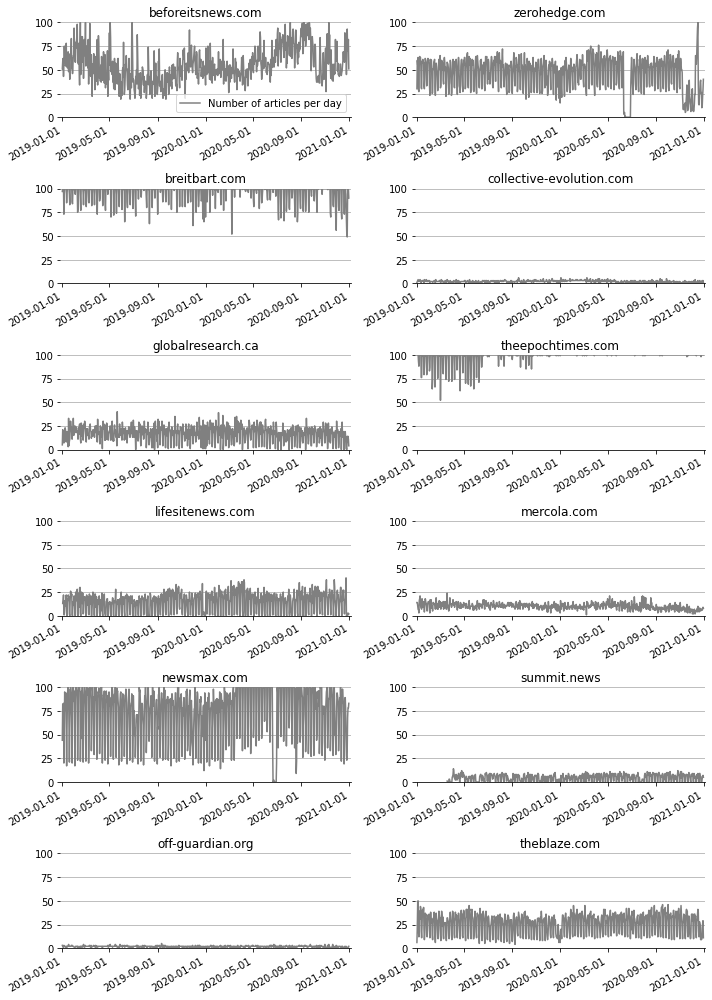

In [59]:
fig = plt.figure(figsize=(10, 14))

for idx in range(len(domains_to_plot)):

    ax = plt.subplot(6, 2, idx + 1)

    df_bz_domain = df_bz[df_bz['domain_name']==domains_to_plot[idx]]

    plt.plot(df_bz_domain.resample('D', on='date')['date'].agg('count'), 
        label="Number of articles per day", color="grey")
    
    arrange_plot(ax)
    
    plt.ylim([0, 100])

    if idx == 0: 
        plt.legend()

plt.tight_layout()
plt.savefig("./shaden_buzzsumo_article_nb.png")